In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns

police=pd.read_csv('rows.csv')
#Filter out needed information
filteredPolice=police[['CMPLNT_FR_DT','CMPLNT_FR_TM','OFNS_DESC', 'PD_DESC', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Latitude', 'Longitude']]
#delete unused df
del police
#Rename descriptors
filteredPolice=filteredPolice.rename(columns={'CMPLNT_FR_DT': 'Complaint Date','CMPLNT_FR_TM':'Complaint Time','OFNS_DESC':'Offence Description', 'PD_DESC':'PD Descriptions', 'LAW_CAT_CD':'Catagory', 'LOC_OF_OCCUR_DESC':'Location', 'SUSP_AGE_GROUP':'Suspects Age', 'SUSP_RACE':'Suspects Race', 'SUSP_SEX':'Suspects Gender', 'VIC_AGE_GROUP':'Victims Age', 'VIC_RACE':'Victims Race', 'VIC_SEX':'Victims Gender'})
filteredPolice["Complaint Date"] = filteredPolice["Complaint Date"].map(str) + ' ' + filteredPolice["Complaint Time"].map(str)
#Convert to date format
filteredPolice['Complaint Date'] = pd.to_datetime(filteredPolice['Complaint Date'], errors = 'coerce')
#Filter date range
mask = (filteredPolice['Complaint Date'] > '01-01-2012') & (filteredPolice['Complaint Date'] <= '12-31-2017')
filteredPolice = filteredPolice.loc[mask]
#Convert to datetime format and round to nearest hour
filteredPolice['Complaint Date'] = filteredPolice['Complaint Date'].dt.round('h')
#delete useless column
del filteredPolice['Complaint Time']
#Remove NaN rows of pertinent data
filteredPolice = filteredPolice.dropna(subset=['PD Descriptions'])

/home/hooch/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Load Weather csv's
weather=pd.read_csv('weather_description.csv')
temp=pd.read_csv('temperature.csv')
#Filter out NY weather
nyWeather=weather[['datetime','New York']]
#filter out ny temp
nyTemp=temp[['datetime','New York']]
#delete unused dfs
del weather
del temp
#rename columns
nyTemp=nyTemp.rename(columns={'datetime': 'Complaint Date','New York': 'Temperature'})
nyWeather=nyWeather.rename(columns={'datetime': 'Complaint Date','New York': 'Cloud Cover'})
#merge weather and temp csv's
nyWeather=pd.merge(nyWeather, nyTemp, on='Complaint Date')
#Convert Temp(K) into (F) and round to nearest whole degree
#because 'merica 
nyWeather['Temperature'] = nyWeather['Temperature'].apply(lambda x: x * 9/5 -459.67)
nyWeather['Temperature'] = nyWeather['Temperature'].apply(lambda x: round(x, 0) )
#Remove NaN rows of pertinent data
nyWeather = nyWeather.dropna(subset=['Cloud Cover'])  
nyWeather = nyWeather.dropna(subset=['Temperature'])  

In [3]:
#Convert to dateTime and Merge
filteredPolice['Complaint Date'] = pd.to_datetime(filteredPolice['Complaint Date'], errors = 'coerce')
nyWeather['Complaint Date'] = pd.to_datetime(nyWeather['Complaint Date'], errors = 'coerce')
mergedInfo=pd.merge(nyWeather, filteredPolice, on='Complaint Date')

In [4]:
#delete further unused dfs
del filteredPolice
del nyWeather
del nyTemp

In [5]:
#Create catagory numbers
mergedInfo['Weather Code'] = mergedInfo.groupby(['Cloud Cover']).ngroup()
mergedInfo['Description Code'] = mergedInfo.groupby(['PD Descriptions']).ngroup()
mergedInfo['Catagory Code'] = mergedInfo.groupby(['Catagory']).ngroup()
mergedInfo['Offence Code'] = mergedInfo.groupby(['Offence Description']).ngroup()
mergedInfo['Age Code'] = mergedInfo.groupby(['Suspects Age']).ngroup()
mergedInfo['Race Code'] = mergedInfo.groupby(['Suspects Race']).ngroup()
#reorder and drop useless collumns
mergedInfo=mergedInfo[['Complaint Date','Cloud Cover','Weather Code','Temperature','Offence Description','Offence Code','PD Descriptions','Description Code','Catagory','Catagory Code', 'Suspects Age', 'Age Code', 'Suspects Race', 'Race Code', 'Suspects Gender','Latitude', 'Longitude' ]]
#Display Final data
mergedInfo

Complaint Date   Cloud Cover  Weather Code  Temperature  \
0       2012-10-01 13:00:00    few clouds             3         59.0   
1       2012-10-01 13:00:00    few clouds             3         59.0   
2       2012-10-01 13:00:00    few clouds             3         59.0   
3       2012-10-01 13:00:00    few clouds             3         59.0   
4       2012-10-01 13:00:00    few clouds             3         59.0   
5       2012-10-01 13:00:00    few clouds             3         59.0   
6       2012-10-01 13:00:00    few clouds             3         59.0   
7       2012-10-01 13:00:00    few clouds             3         59.0   
8       2012-10-01 13:00:00    few clouds             3         59.0   
9       2012-10-01 13:00:00    few clouds             3         59.0   
10      2012-10-01 13:00:00    few clouds             3         59.0   
11      2012-10-01 13:00:00    few clouds             3         59.0   
12      2012-10-01 13:00:00    few clouds             3         59.0   
13      2012-10-01 13:00:00    few clouds             3         59.0   
14      2012-10-01 13:00:00    few clouds             3         59.0   
15      2012-10-01 13:00:00    few clouds             3         59.0   
16      2012-10-01 13:00:00    few clouds             3         59.0   
17      2012-10-01 13:00:00    few clouds             3         59.0   
18      2012-10-01 13:00:00    few clouds             3         59.0   
19      2012-10-01 13:00:00    few clouds             3         59.0   
20      2012-10-01 13:00:00    few clouds             3         59.0   
21      2012-10-01 13:00:00    few clouds             3         59.0   
22      2012-10-01 13:00:00    few clouds             3         59.0   
23      2012-10-01 13:00:00    few clouds             3         59.0   
24      2012-10-01 13:00:00    few clouds             3         59.0   
25      2012-10-01 13:00:00    few clouds             3         59.0   
26      2012-10-01 13:00:00    few clouds             3         59.0   
27      2012-10-01 13:00:00    few clouds             3         59.0   
28      2012-10-01 13:00:00    few clouds             3         59.0   
29      2012-10-01 13:00:00    few clouds             3         59.0   
...                     ...           ...           ...          ...   
2445531 2017-10-28 00:00:00  sky is clear            26         53.0   
2445532 2017-10-28 00:00:00  sky is clear            26         53.0   
2445533 2017-10-28 00:00:00  sky is clear            26         53.0   
2445534 2017-10-28 00:00:00  sky is clear            26         53.0   
2445535 2017-10-28 00:00:00  sky is clear            26         53.0   
2445536 2017-10-28 00:00:00  sky is clear            26         53.0   
2445537 2017-10-28 00:00:00  sky is clear            26         53.0   
2445538 2017-10-28 00:00:00  sky is clear            26         53.0   
2445539 2017-10-28 00:00:00  sky is clear            26         53.0   
2445540 2017-10-28 00:00:00  sky is clear            26         53.0   
2445541 2017-10-28 00:00:00  sky is clear            26         53.0   
2445542 2017-10-28 00:00:00  sky is clear            26         53.0   
2445543 2017-10-28 00:00:00  sky is clear            26         53.0   
2445544 2017-10-28 00:00:00  sky is clear            26         53.0   
2445545 2017-10-28 00:00:00  sky is clear            26         53.0   
2445546 2017-10-28 00:00:00  sky is clear            26         53.0   
2445547 2017-10-28 00:00:00  sky is clear            26         53.0   
2445548 2017-10-28 00:00:00  sky is clear            26         53.0   
2445549 2017-10-28 00:00:00  sky is clear            26         53.0   
2445550 2017-10-28 00:00:00  sky is clear            26         53.0   
2445551 2017-10-28 00:00:00  sky is clear            26         53.0   
2445552 2017-10-28 00:00:00  sky is clear            26         53.0   
2445553 2017-10-28 00:00:00  sky is clear            26         53.0   
2445554 2017-10-28 00:00:00  sky is clear            

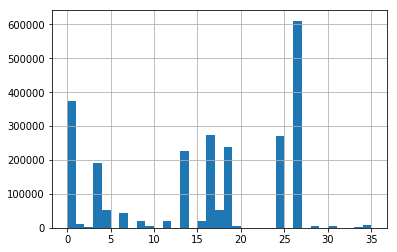

In [6]:
#Graph showing most crimes commited when "Sky is clear"
mergedInfo["Weather Code"].hist(bins=35)

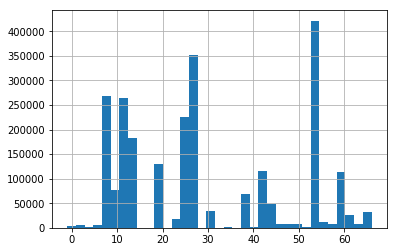

In [7]:
#Most common crimes
mergedInfo["Offence Code"].hist(bins=35)

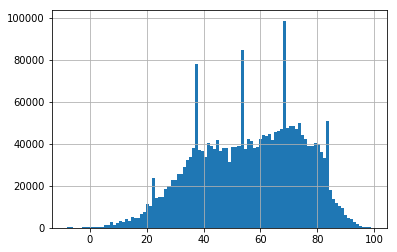

In [8]:
#crimes by temperature (Peaks around 76 and drops quickly!)
mergedInfo["Temperature"].hist(bins=100)

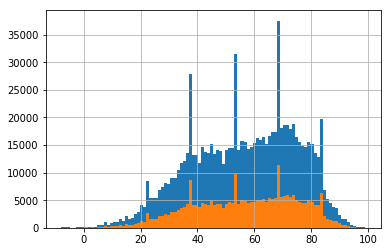

In [9]:
#creating new df's for individual stats
sexCrimes = mergedInfo.drop(mergedInfo.index[mergedInfo['Offence Description'] != 'SEX CRIMES'])
GTA = mergedInfo.drop(mergedInfo.index[mergedInfo['Offence Description'] != 'GRAND LARCENY OF MOTOR VEHICLE'])
Men = mergedInfo.drop(mergedInfo.index[mergedInfo['Suspects Gender'] != 'M'])
Women = mergedInfo.drop(mergedInfo.index[mergedInfo['Suspects Gender'] != 'F'])
#Comparing crime rates of men and women based on temp
Men["Temperature"].hist(bins=100)
Women["Temperature"].hist(bins=100)

#Women commit less crimes as a whole, but at the same occurence levels...

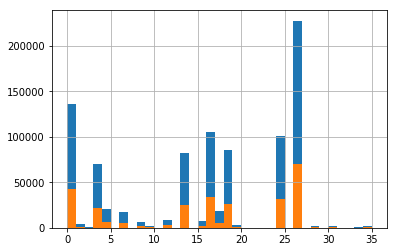

In [10]:
Men["Weather Code"].hist(bins=35)
Women["Weather Code"].hist(bins=35)
#again, men and women at roughly the same rate of cloud cover

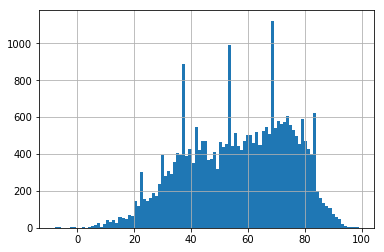

In [11]:
sexCrimes["Temperature"].hist(bins=100)
#SexCrimes based on temp.  
#(Rape goes up when icecream sales do addage not true, except at 79)

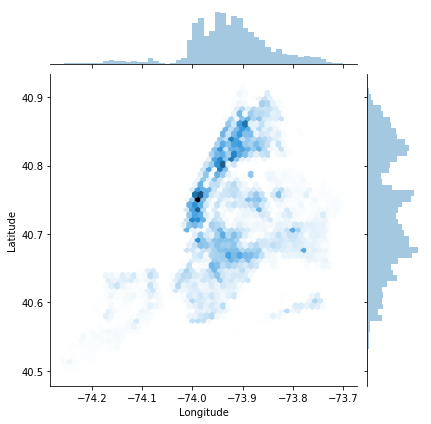

In [12]:
sns.jointplot(x="Longitude", y="Latitude", data=mergedInfo, kind="hex")
#map of all crime

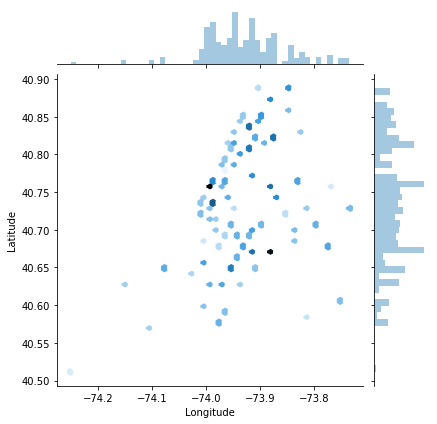

In [13]:
sns.jointplot(x="Longitude", y="Latitude", data=sexCrimes, kind="hex")
#Map of all sex crimes

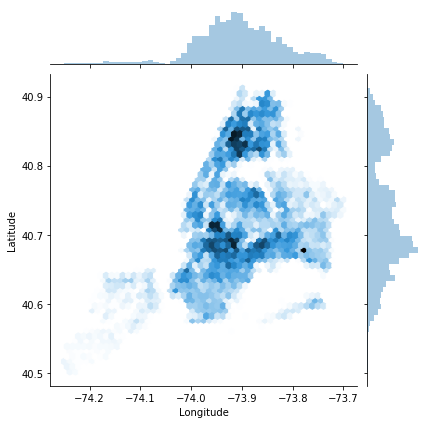

In [14]:
sns.jointplot(x="Longitude", y="Latitude", data=GTA, kind="hex")
#map of all car thefts. ie Dont own a car in the bx or queens
#Top corner is 278 meeting with 2 other highways, middle is 495. stealing cars and jumping on HW

In [15]:
#Seperating select weather conditions and checking
clear = mergedInfo.drop(mergedInfo.index[mergedInfo['Cloud Cover'] != 'sky is clear'])
rain = mergedInfo.drop(mergedInfo.index[mergedInfo['Cloud Cover'] != 'moderate rain'])
clouds = mergedInfo.drop(mergedInfo.index[mergedInfo['Cloud Cover'] != 'few clouds'])
storm = mergedInfo.drop(mergedInfo.index[mergedInfo['Cloud Cover'] != 'thunderstorm with heavy rain'])

Text(0.5,0.98,'thunderstorm with heavy rain')

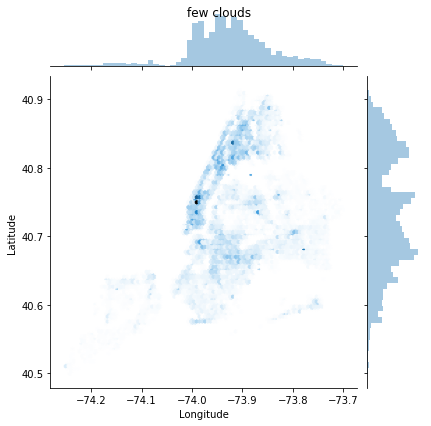

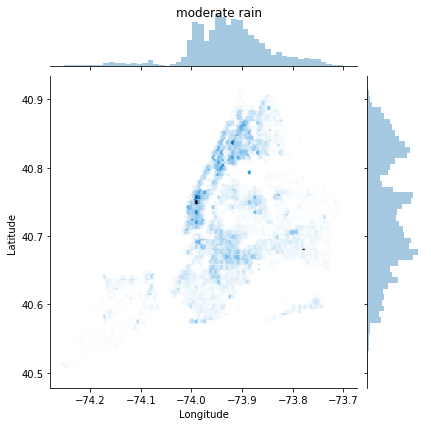

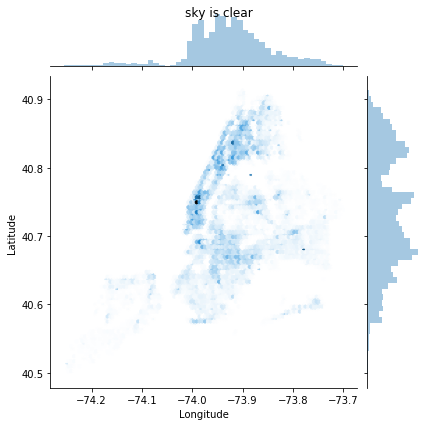

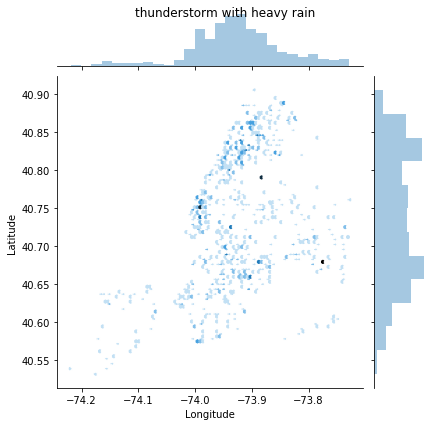

In [16]:
joint_kws=dict(gridsize=100)
cloudg = sns.jointplot(x="Longitude", y="Latitude", data=clouds, kind="hex", joint_kws= joint_kws)
cloudg.fig.suptitle("few clouds")
raing = sns.jointplot(x="Longitude", y="Latitude", data=rain, kind="hex", joint_kws= joint_kws)
raing.fig.suptitle("moderate rain")
clearg =  sns.jointplot(x="Longitude", y="Latitude", data=clear, kind="hex", joint_kws= joint_kws)
clearg.fig.suptitle("sky is clear")
stormg = sns.jointplot(x="Longitude", y="Latitude", data=storm, kind="hex", joint_kws= joint_kws)
stormg.fig.suptitle("thunderstorm with heavy rain")

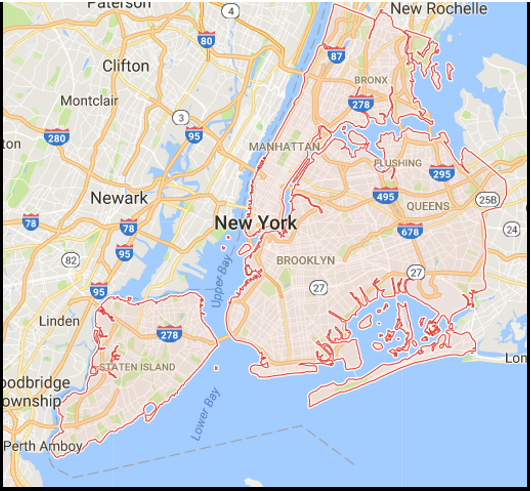

In [17]:
from IPython.display import Image
Image(filename='NYC.png') 

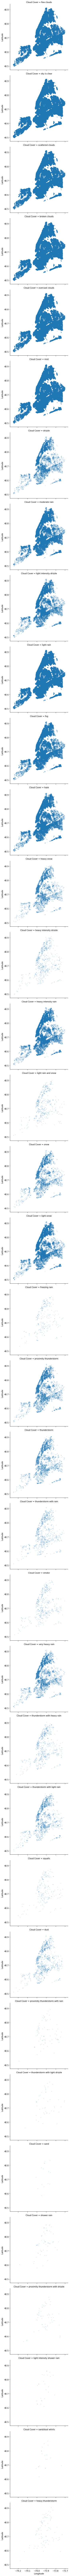

In [18]:
#Same thing as above, just for all Cloud Cover types
g = sns.FacetGrid(mergedInfo, col="Cloud Cover",col_wrap=1, height=5)
g.map(plt.scatter, "Longitude", "Latitude", alpha=.1, s=10)

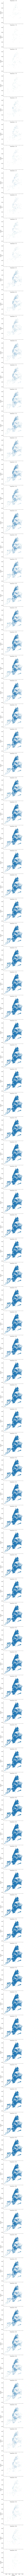

In [19]:
#Crime rates for all temps
g = sns.FacetGrid(mergedInfo, col="Temperature",col_wrap=1, height=5)
g.map(plt.scatter, "Longitude", "Latitude", alpha=.1, s=10)

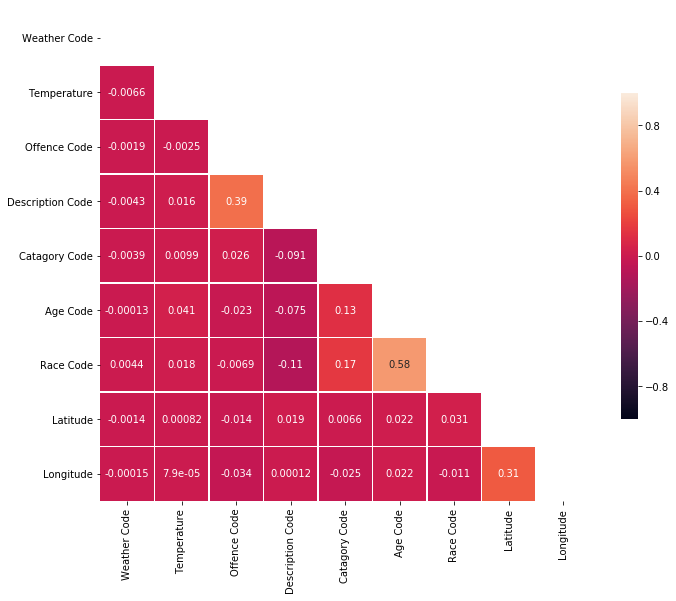

In [20]:
#set up a correlation matrix
corr_matrix = mergedInfo.corr()
#Setup a heatmap with that correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cbar_kws = {'shrink': .4},
                      vmin = -1, 
                      vmax = 1,
                      annot = True)
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [21]:
mergedInfo.to_csv('mergedInfo.csv')

In [22]:
corr_matrix

Weather Code  Temperature  Offence Code  Description Code  \
Weather Code          1.000000    -0.006626     -0.001862         -0.004307   
Temperature          -0.006626     1.000000     -0.002458          0.015634   
Offence Code         -0.001862    -0.002458      1.000000          0.390674   
Description Code     -0.004307     0.015634      0.390674          1.000000   
Catagory Code        -0.003928     0.009918      0.025922         -0.091453   
Age Code             -0.000131     0.041468     -0.023202         -0.075496   
Race Code             0.004364     0.017867     -0.006907         -0.113378   
Latitude             -0.001373     0.000818     -0.014480          0.019483   
Longitude            -0.000152     0.000079     -0.033632          0.000120   

                  Catagory Code  Age Code  Race Code  Latitude  Longitude  
Weather Code          -0.003928 -0.000131   0.004364 -0.001373  -0.000152  
Temperature            0.009918  0.041468   0.017867  0.000818   0.000079  
Offence Code           0.025922 -0.023202  -0.006907 -0.014480  -0.033632  
Description Code      -0.091453 -0.075496  -0.113378  0.019483   0.000120  
Catagory Code          1.000000  0.130990   0.170101  0.006618  -0.024779  
Age Code               0.130990  1.000000   0.583276  0.021852   0.021826  
Race Code              0.170101  0.583276   1.000000  0.031429  -0.010875  
Latitude               0.006618  0.021852   0.031429  1.000000   0.308552  
Longitude             -0.024779  0.021826  -0.010875  0.308552   1.000000

In [ ]:
plot = mergedInfo.plot.pie(y='Weather Code', figsize=(5, 5))

In [ ]:
bplot = sns.boxplot(y='lifeExp', x='continent', 
                 data=gapminder_2007, 
                 width=0.5,
                 palette="colorblind")